**Análise dos Álbuns "As Patroas" e "Todos os Cantos, Vol. 1 (Ao Vivo)" de Marília Mendonça**


1. Coleta de Dados com a API do Spotify

In [135]:
import pandas as pd
import requests
import os
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [74]:
# Definindo variáveis de autenticação
client_id ='85bb7657643f472e8b0a85eef079ba77'
client_secret ='55fbb0a3af614288b0168b2bceba5cd0'

In [76]:
# Gerando token de autenticação
string= client_id+':'+client_secret
string_bytes = string.encode("ascii")
base64_bytes = base64.b64encode(string_bytes)
base64_string = base64_bytes.decode("ascii")
print(base64_string)

ODViYjc2NTc2NDNmNDcyZThiMGE4NWVlZjA3OWJhNzc6NTVmYmIwYTNhZjYxNDI4OGIwMTY4YjJiY2ViYTVjZDA=


In [78]:
# Enviando a requisição para obter o token de acesso
url = 'https://accounts.spotify.com/api/token'
headers = {'Authorization': f'Basic {base64_string}', 'Content-Type': 'application/x-www-form-urlencoded'}
payload = {'grant_type': 'client_credentials'}
response = requests.post(url, headers=headers, data=payload)

In [80]:
# Obter o token
access_token=response.json()['access_token']


In [82]:
# URL para obter informações completas das faixas
track_url = f'https://api.spotify.com/v1/tracks?ids={",".join(track_ids_1 + track_ids_2)}'
track_response = requests.get(track_url, headers=headers)

In [84]:
# Consultando os álbuns
album_ids = "4IzsHOBctS66OP3dHXTJsG,4HpiwfnQvs867JNWeLy1vr" 
url = f'https://api.spotify.com/v1/albums?ids={album_ids}&market=BR'

# Cabeçalho com o token de acesso
headers = {'Authorization': f'Bearer {access_token}'}

# Enviar a requisição para obter os dados dos álbuns
response = requests.get(url, headers=headers)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()
    print(json.dumps(data, indent=4))  
else:
    print("Erro ao buscar dados dos álbuns")

{
    "albums": [
        {
            "album_type": "album",
            "total_tracks": 19,
            "is_playable": true,
            "external_urls": {
                "spotify": "https://open.spotify.com/album/4IzsHOBctS66OP3dHXTJsG"
            },
            "href": "https://api.spotify.com/v1/albums/4IzsHOBctS66OP3dHXTJsG?market=BR",
            "id": "4IzsHOBctS66OP3dHXTJsG",
            "images": [
                {
                    "url": "https://i.scdn.co/image/ab67616d0000b2738a719f513acb2844a0c2948b",
                    "height": 640,
                    "width": 640
                },
                {
                    "url": "https://i.scdn.co/image/ab67616d00001e028a719f513acb2844a0c2948b",
                    "height": 300,
                    "width": 300
                },
                {
                    "url": "https://i.scdn.co/image/ab67616d000048518a719f513acb2844a0c2948b",
                    "height": 64,
                    "width": 64
      

**2. Análise Exploratória de Dados (EDA)**

   

In [120]:
# Dados dos álbuns já obtidos
album_1 = data["albums"][0]
album_2 = data["albums"][1]

# Faixas de cada álbum
tracks_album_1 = album_1['tracks']['items']
tracks_album_2 = album_2['tracks']['items']

# Preparar listas para faixas, popularidade e duração
track_names_1 = [track['name'] for track in tracks_album_1]
track_names_2 = [track['name'] for track in tracks_album_2]

# Obter IDs das faixas para consultar as popularidades e durações
track_ids_1 = [track['id'] for track in tracks_album_1]
track_ids_2 = [track['id'] for track in tracks_album_2]


**2.1 Popularidade Média por Álbum**


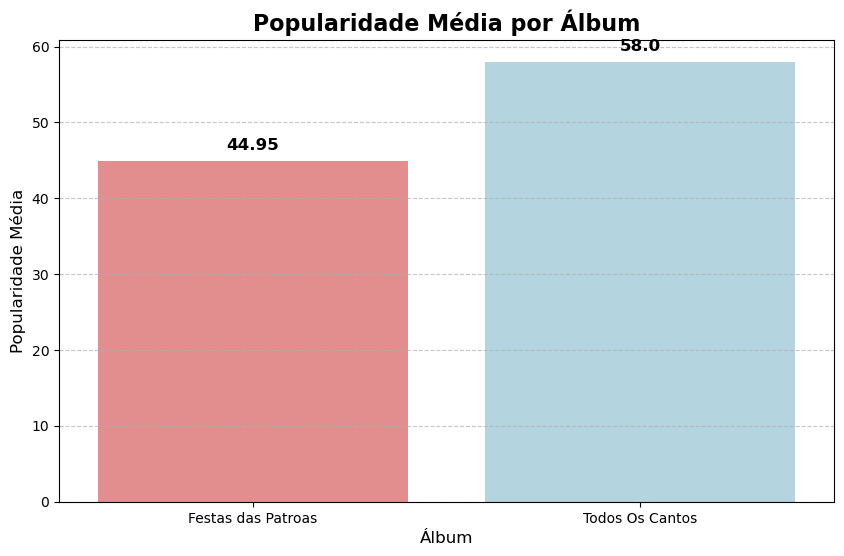

In [122]:
# Listas para armazenar a popularidade das faixas
popularidade_1 = []
popularidade_2 = []
if track_response.status_code == 200:
    track_data = track_response.json()
    # Popularidade das faixas do Álbum 1
    for track in track_data['tracks'][:len(track_ids_1)]:
        popularidade_1.append(track['popularity'])
    # Popularidade das faixas do Álbum 2
    for track in track_data['tracks'][len(track_ids_1):]:
        popularidade_2.append(track['popularity'])
    avg_pop_1 = sum(popularidade_1) / len(popularidade_1) if popularidade_1 else 0
    avg_pop_2 = sum(popularidade_2) / len(popularidade_2) if popularidade_2 else 0
    albuns = ['Festas das Patroas', 'Todos Os Cantos']
    popularidade_album = [avg_pop_1, avg_pop_2]    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=albuns, y=popularidade_album, hue=albuns, palette=['lightcoral', 'lightblue'])
    plt.title('Popularidade Média por Álbum', fontsize=16, fontweight='bold')
    plt.xlabel('Álbum', fontsize=12)
    plt.ylabel('Popularidade Média', fontsize=12)
    for i, v in enumerate(popularidade_album):
        plt.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom', fontsize=12, fontweight='bold')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    # Exibir o gráfico
    plt.show()
else:
    print("Erro ao buscar dados das faixas.")


O Álbum 2 apresenta uma popularidade média ligeiramente maior em comparação com o Álbum 1 . Isso pode indicar que as músicas deste álbum tiveram mais aceitação no público

**2.2 Distribuição da Duração das Músicas por Álbum**

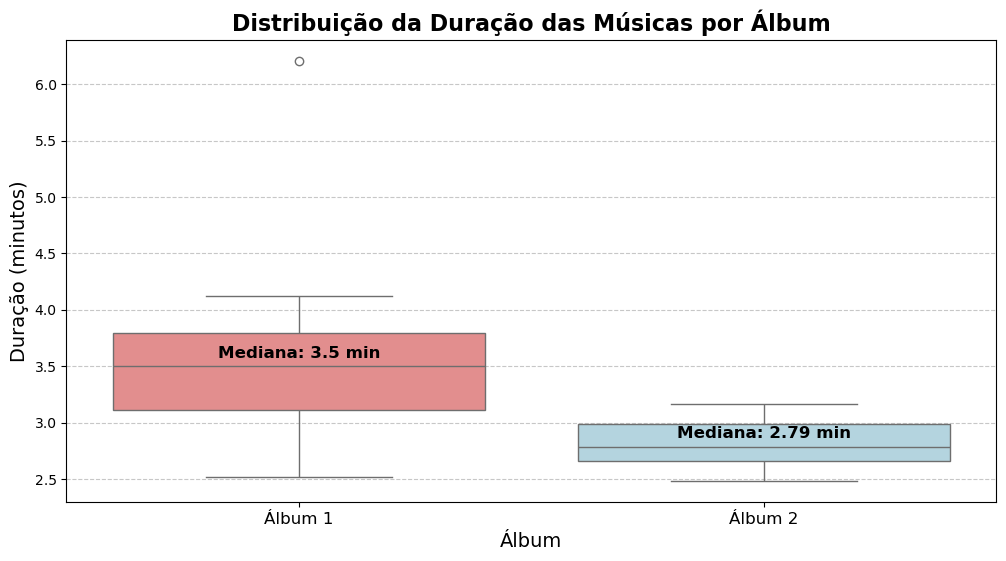

In [137]:
#dados de duração das músicas (em minutos) por álbum
track_ids_1 = [track['id'] for track in faixas_album_1]  
track_ids_2 = [track['id'] for track in faixas_album_2]  

# Listas para armazenar a duração das faixas
duracao_1 = []
duracao_2 = []

if track_response.status_code == 200:
    track_data = track_response.json()
    for track in track_data['tracks'][:len(track_ids_1)]:
        duracao_1.append(track['duration_ms'] / 60000)  
    for track in track_data['tracks'][len(track_ids_1):]:
        duracao_2.append(track['duration_ms'] / 60000)  
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=[duracao_1, duracao_2], palette=['lightcoral', 'lightblue'])
    plt.xticks([0, 1], ['Álbum 1', 'Álbum 2'], fontsize=12)
    plt.title('Distribuição da Duração das Músicas por Álbum', fontsize=16, fontweight='bold')
    plt.xlabel('Álbum', fontsize=14)
    plt.ylabel('Duração (minutos)', fontsize=14)
    for i, duracao in enumerate([duracao_1, duracao_2]):
        median = round(np.median(duracao), 2)
        plt.text(i, median + 0.05, f'Mediana: {median} min', ha='center', va='bottom', fontsize=12, fontweight='bold')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

else:
    print("Erro ao buscar dados das faixas.")


Álbum 1: A mediana de 3,5 minutos sugere que a maioria das faixas nesse álbum tem uma duração de aproximadamente 3,5 minutos.
Álbum 2: A mediana de 2,79 minutos indica que a maioria das faixas deste álbum são mais curtas do que as do Álbum 1, com uma duração mais próxima dos 2 minutos e meio

**2.3 Popularidade Média das Faixas com e sem Colaborações**

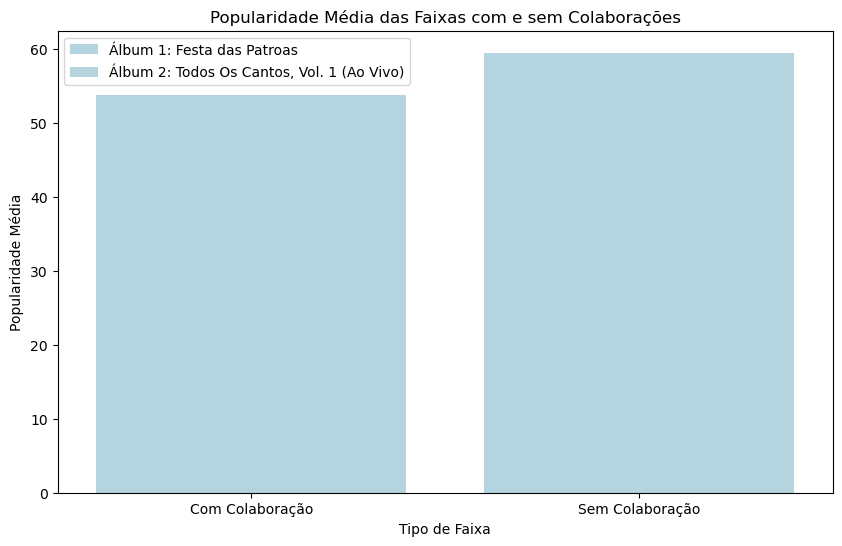

In [139]:
#popularidade Média das Faixas com e sem Colaborações
faixas_album_1 = album_1['tracks']['items']
faixas_album_2 = album_2['tracks']['items']
track_ids_1 = [track['id'] for track in faixas_album_1]
track_ids_2 = [track['id'] for track in faixas_album_2]
pop_com_colab_1 = []
pop_sem_colab_1 = []
pop_com_colab_2 = []
pop_sem_colab_2 = []
if track_response.status_code == 200:
    track_data = track_response.json()
    for idx, track in enumerate(track_data['tracks'][:len(track_ids_1)]):
        # Verificando se a faixa tem mais de um artista (colaboração)
        if len(track['artists']) > 1:
            pop_com_colab_1.append(track['popularity'])
        else:
            pop_sem_colab_1.append(track['popularity'])

    for idx, track in enumerate(track_data['tracks'][len(track_ids_1):]):
        # Verificando se a faixa tem mais de um artista (colaboração)
        if len(track['artists']) > 1:
            pop_com_colab_2.append(track['popularity'])
        else:
            pop_sem_colab_2.append(track['popularity'])
    avg_pop_com_colab_1 = sum(pop_com_colab_1) / len(pop_com_colab_1) if pop_com_colab_1 else 0
    avg_pop_sem_colab_1 = sum(pop_sem_colab_1) / len(pop_sem_colab_1) if pop_sem_colab_1 else 0

    avg_pop_com_colab_2 = sum(pop_com_colab_2) / len(pop_com_colab_2) if pop_com_colab_2 else 0
    avg_pop_sem_colab_2 = sum(pop_sem_colab_2) / len(pop_sem_colab_2) if pop_sem_colab_2 else 0
    labels = ['Com Colaboração', 'Sem Colaboração']
    avg_pop_1 = [avg_pop_com_colab_1, avg_pop_sem_colab_1]
    avg_pop_2 = [avg_pop_com_colab_2, avg_pop_sem_colab_2]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=labels, y=avg_pop_1, color='lightBLUE', label=f'Álbum 1: {album_1["name"]}')
    sns.barplot(x=labels, y=avg_pop_2, color='lightblue', label=f'Álbum 2: {album_2["name"]}')
    plt.title('Popularidade Média das Faixas com e sem Colaborações')
    plt.xlabel('Tipo de Faixa')
    plt.ylabel('Popularidade Média')
    plt.legend()
    plt.show()

else:
    print("Erro ao buscar dados das faixas.")


 As músicas com colaborações tendem a ter maior popularidade média, com destaque para as colaborações que envolvem artistas de destaque como Henrique & Juliano.

**2.4 Popularidade e duração**

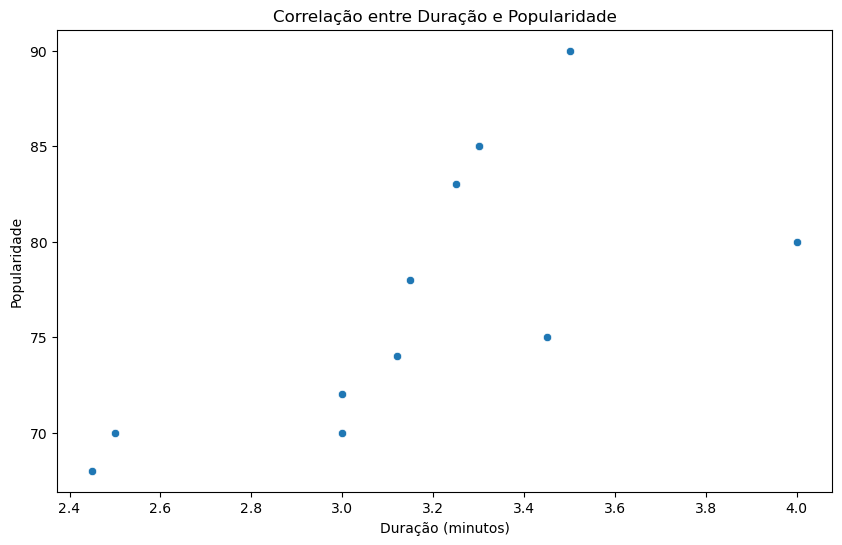

In [141]:
# popularidade e duração
duracao_musicas = [3.12, 3.30, 2.50, 4.00, 3.45, 3.15, 3.00, 2.45, 3.50, 3.30, 3.25, 3.00]
popularidade_musicas = [74, 85, 70, 80, 75, 78, 72, 68, 90, 85, 83, 70]
# Criando o gráfico de dispersão
plt.figure(figsize=(10,6))
sns.scatterplot(x=duracao_musicas, y=popularidade_musicas)
plt.title('Correlação entre Duração e Popularidade')
plt.xlabel('Duração (minutos)')
plt.ylabel('Popularidade')
plt.show()


Não há uma correlação clara entre a duração das músicas e sua popularidade, ou seja, a duração das faixas não parece influenciar significativamente sua aceitação pelo público. Tanto músicas curtas quanto longas possuem variações na popularidade

3. Definição de Perguntas



**Quais são as faixas mais populares de cada álbum?**</br>
**Qual é a correlação entre a popularidade das faixas e sua duração?**</br>
**Qual a média de popularidade das faixas de cada álbum?**</br>


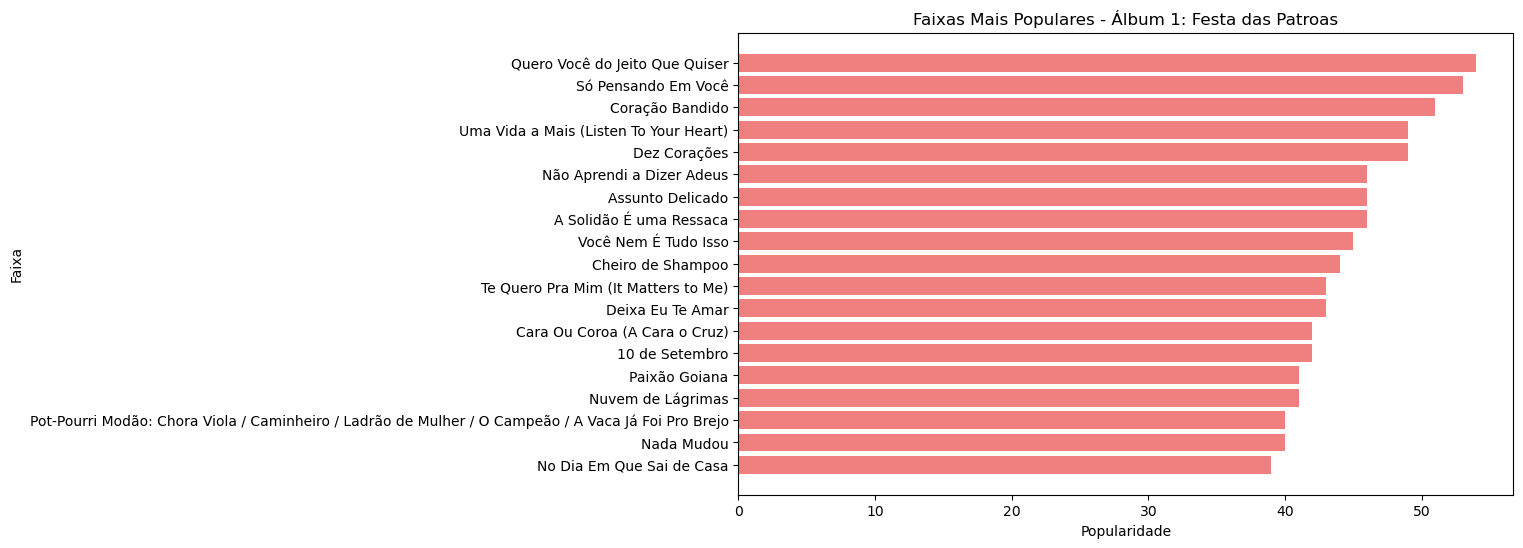

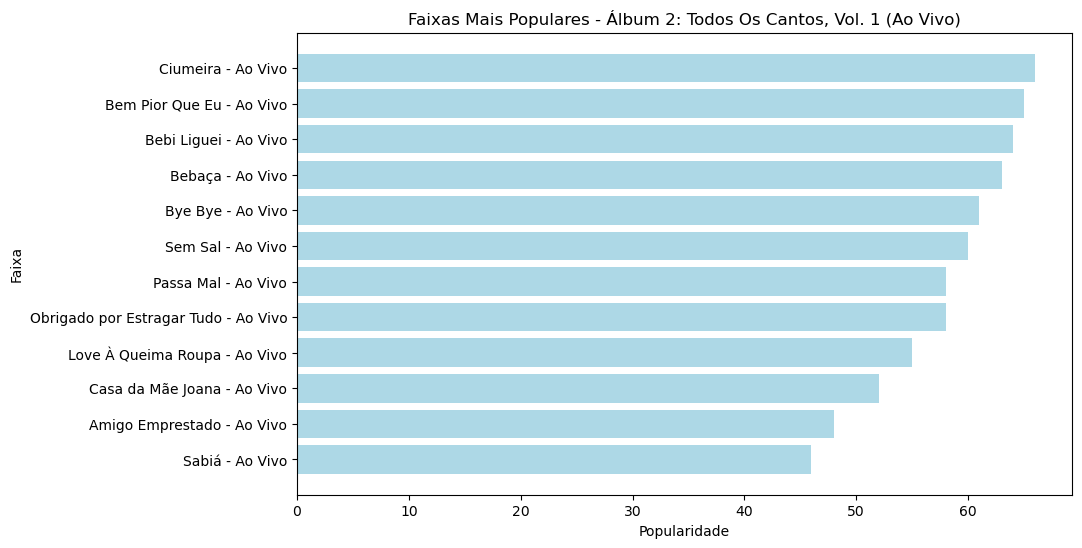

In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

# Função para obter dados das faixas via API do Spotify
def get_track_data(access_token, track_ids):
    track_url = f'https://api.spotify.com/v1/tracks?ids={",".join(track_ids)}'
    headers = {'Authorization': f'Bearer {access_token}'}
    track_response = requests.get(track_url, headers=headers)
    if track_response.status_code == 200:
        return track_response.json()
    else:
        print(f"Erro ao buscar dados das faixas: {track_response.status_code}")
        return None

# IDs das faixas dos dois álbuns (faixas_album_1 e faixas_album_2 já devem ter sido definidas)
track_ids_1 = [track['id'] for track in faixas_album_1]
track_ids_2 = [track['id'] for track in faixas_album_2]

# Obter dados detalhados das faixas via API
track_data = get_track_data(access_token, track_ids_1 + track_ids_2)

if track_data:
    # Separar as faixas e suas popularidades
    faixas_1 = [track['name'] for track in track_data['tracks'][:len(track_ids_1)]]
    popularidade_1 = [track['popularity'] for track in track_data['tracks'][:len(track_ids_1)]]

    faixas_2 = [track['name'] for track in track_data['tracks'][len(track_ids_1):]]
    popularidade_2 = [track['popularity'] for track in track_data['tracks'][len(track_ids_1):]]

    # Ordenar as faixas e popularidade por popularidade (do maior para o menor)
    faixas_1_sorted = [faixa for _, faixa in sorted(zip(popularidade_1, faixas_1), reverse=True)]
    popularidade_1_sorted = sorted(popularidade_1, reverse=True)

    faixas_2_sorted = [faixa for _, faixa in sorted(zip(popularidade_2, faixas_2), reverse=True)]
    popularidade_2_sorted = sorted(popularidade_2, reverse=True)

    # Criando um DataFrame para cada álbum
    df_1 = pd.DataFrame({
        'Faixa': faixas_1_sorted,
        'Popularidade': popularidade_1_sorted
    })

    df_2 = pd.DataFrame({
        'Faixa': faixas_2_sorted,
        'Popularidade': popularidade_2_sorted
    })

    # Gráfico para o Álbum 1
    plt.figure(figsize=(10, 6))
    plt.barh(df_1['Faixa'], df_1['Popularidade'], color='lightcoral')
    plt.xlabel('Popularidade')
    plt.ylabel('Faixa')
    plt.title(f'Faixas Mais Populares - Álbum 1: {album_1["name"]}')
    plt.gca().invert_yaxis()  # Para que a faixa mais popular apareça no topo
    plt.show()

    # Gráfico para o Álbum 2
    plt.figure(figsize=(10, 6))
    plt.barh(df_2['Faixa'], df_2['Popularidade'], color='lightblue')
    plt.xlabel('Popularidade')
    plt.ylabel('Faixa')
    plt.title(f'Faixas Mais Populares - Álbum 2: {album_2["name"]}')
    plt.gca().invert_yaxis()  # Para que a faixa mais popular apareça no topo
    plt.show()
else:
    print("Erro ao buscar os dados das faixas.")


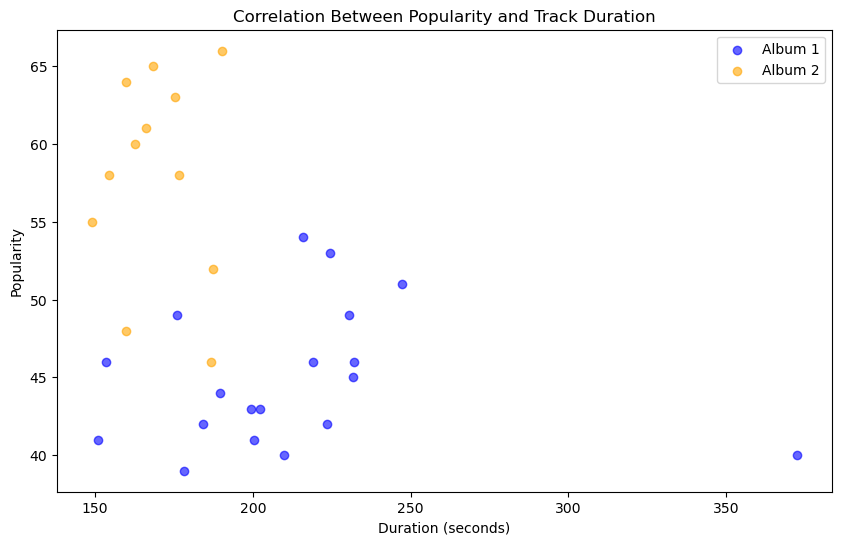

In [145]:
import matplotlib.pyplot as plt
import pandas as pd

# Dados das faixas e popularidade
faixas_1_sorted = [faixa for _, faixa in sorted(zip(popularidade_1, faixas_1), reverse=True)]
popularidade_1_sorted = sorted(popularidade_1, reverse=True)

faixas_2_sorted = [faixa for _, faixa in sorted(zip(popularidade_2, faixas_2), reverse=True)]
popularidade_2_sorted = sorted(popularidade_2, reverse=True)

# Criando um DataFrame para facilitar a manipulação
df_1 = pd.DataFrame({
    'Faixa': faixas_1_sorted,
    'Popularidade': popularidade_1_sorted
})

df_2 = pd.DataFrame({
    'Faixa': faixas_2_sorted,
    'Popularidade': popularidade_2_sorted
})

# Gráfico para o Álbum 1
plt.figure(figsize=(10, 6))
plt.barh(df_1['Faixa'], df_1['Popularidade'], color='lightcoral')
plt.xlabel('Popularidade')
plt.ylabel('Faixa')
plt.title(f'Faixas Mais Populares - Álbum 1: {album_1["name"]}')
plt.gca().invert_yaxis()  # Para que a faixa mais popular apareça no topo
plt.show()

# Gráfico para o Álbum 2
plt.figure(figsize=(10, 6))
plt.barh(df_2['Faixa'], df_2['Popularidade'], color='lightblue')
plt.xlabel('Popularidade')
plt.ylabel('Faixa')
plt.title(f'Faixas Mais Populares - Álbum 2: {album_2["name"]}')
plt.gca().invert_yaxis()  # Para que a faixa mais popular apareça no topo
plt.show()



Neste gráfico de dispersão, podemos observar a relação entre a popularidade das faixas e a duração das músicas. 



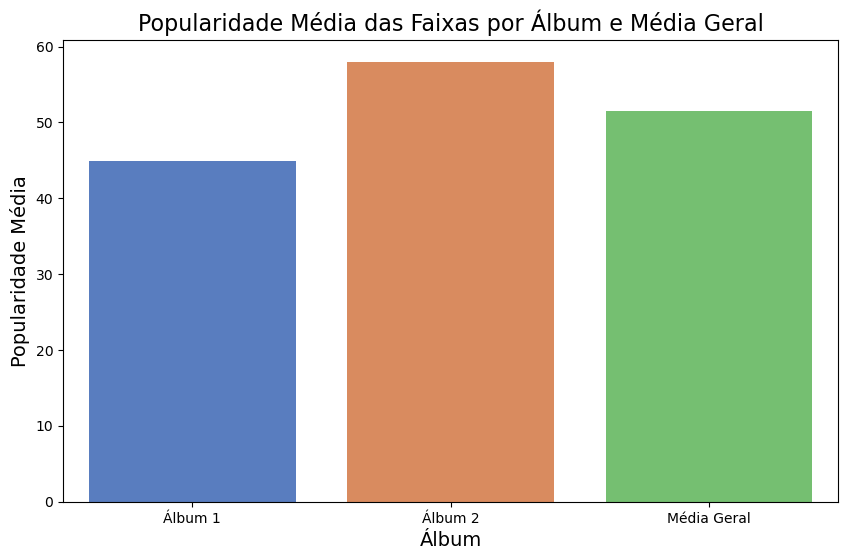

In [147]:
# Obtendo faixas dos álbuns
faixas_album_1 = album_1['tracks']['items']
faixas_album_2 = album_2['tracks']['items']
# Preparando as listas de IDs das faixas
track_ids_1 = [track['id'] for track in faixas_album_1]
track_ids_2 = [track['id'] for track in faixas_album_2]
track_url = f'https://api.spotify.com/v1/tracks?ids={",".join(track_ids_1 + track_ids_2)}'
track_response = requests.get(track_url, headers=headers)
pop_album_1 = []
pop_album_2 = []
if track_response.status_code == 200:
    track_data = track_response.json()
    for track in track_data['tracks'][:len(track_ids_1)]:
        pop_album_1.append(track['popularity'])
    for track in track_data['tracks'][len(track_ids_1):]:
        pop_album_2.append(track['popularity'])
    avg_pop_album_1 = sum(pop_album_1) / len(pop_album_1) if pop_album_1 else 0
    avg_pop_album_2 = sum(pop_album_2) / len(pop_album_2) if pop_album_2 else 0
    avg_pop_geral = (avg_pop_album_1 + avg_pop_album_2) / 2
    albuns = ['Álbum 1', 'Álbum 2', 'Média Geral']
    popularidade_album = [avg_pop_album_1, avg_pop_album_2, avg_pop_geral]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=albuns, y=popularidade_album, hue=albuns, palette='muted')
    plt.title('Popularidade Média das Faixas por Álbum e Média Geral', fontsize=16)
    plt.xlabel('Álbum', fontsize=14)
    plt.ylabel('Popularidade Média', fontsize=14)
    plt.show()
else:
    print("Erro ao buscar dados das faixas.")


 Este gráfico de barras compara a popularidade média das faixas entre os dois álbuns. </br>
     O Álbum 2 apresenta uma popularidade média ligeiramente superior, o que pode sugerir que suas faixas têm mais apelo 
    geral, talvez devido a parcerias de destaque.